<a href="https://colab.research.google.com/github/zuzannazak/PhD2022Bialowieza/blob/main/%F0%9F%92%96projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ðŸ’–***Projekt z ekonometrii***ðŸ’–

**Authors:**

Wiktoria Rakowska

Monika WesoÅ‚owska

Zuzanna Å»ak


**Data:**
*   Aggregated in https://github.com/zuzannazak/random-files-i-need-sometimes/blob/main/bialowieza.xls :
  *   Chrzty, Å›luby i zgony w parafii prawosÅ‚wanej Å›w. MikoÅ‚aja CudotwÃ³rcy w BiaÅ‚owieÅ¼y https://github.com/pbiecek/SmarterPoland_blog/tree/master/dane/Bialowieza/
  *   Population data for BiaÅ‚owieÅ¼a, rural gmina, from Bank Danych Lokalnych
  *   Population data for Poland https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/struktura-ludnosci,16,1.html 
  *   Religious practices in Poland https://cbos.pl/SPISKOM.POL/2020/K_063_20.PDF 

# ***introduction***



*   BiaÅ‚owieÅ¼a i trochÄ™ o historii miasta
*   Fajne dane urywajace siÄ™ na 2012 (tutaj moÅ¼na wpleÅ›Ä‡ teÅ¼ niektÃ³re wykresy z sekcji visualization (zmieniÄ‡ kolejnoÅ›Ä‡ blokÃ³w strzaÅ‚kami i wrzuciÄ‡ je pomiÄ™dzy bloki tekstu)
*   Projekt - dokoÅ„czenie tych danych, czyli predykcja dalszych maÅ‚Å¼eÅ„stw, chrztÃ³w i zgonÃ³w
*   Dodatkowe dane: dane na temat maÅ‚Å¼eÅ„stw, urodzeÅ„ i zgonÃ³w z gminy, populacja polski, saldo migracji
*   consideration: religijnoÅ›Ä‡ w polsce, przewidujemy rejestr koÅ›cielny (cerkiewny) wiÄ™c w przypadku spadku religijnoÅ›ci moÅ¼na spodziewaÄ‡ siÄ™ spadek tych wartoÅ›ci w rejestrze, nawet jeÅ›li dane cywilne tego nie pokazujÄ…



# ***package import***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***data download***

In [2]:
#original BiaÅ‚owieÅ¼a data
url_data = (r'https://raw.github.com/pbiecek/SmarterPoland_blog/master/dane/Bialowieza/bialowieza.xls')
df = pd.read_excel(url_data)

df.head()

rok  chrzest  slub  zgon
0  1878     62.0   2.0  44.0
1  1879     77.0  14.0  38.0
2  1880     79.0  14.0  60.0
3  1881      NaN   NaN   NaN
4  1882     86.0  17.0  52.0

In [3]:
#aggregated data
url_data = (r'https://github.com/zuzannazak/random-files-i-need-sometimes/blob/49f2717618bf867b22213dd08ee8efd5ab565a1b/bialowieza.xls?raw=true')
df_aggregateddata = pd.read_excel(url_data)

df_aggregateddata.tail(10)

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
138  2016  ...                                     5.0
139  2017  ...                                     5.0
140  2018  ...                                     6.0
141  2019  ...                                     6.0
142  2020  ...                                     7.0
143  2021  ...                                     NaN
144  2022  ...                                     NaN
145  2023  ...                                     NaN
146  2024  ...                                     NaN
147  2025  ...                                     NaN

[10 rows x 13 columns]

In [4]:
df_aggregateddata.drop(df.tail(5).index,inplace=True)

#***data visualisation*** 

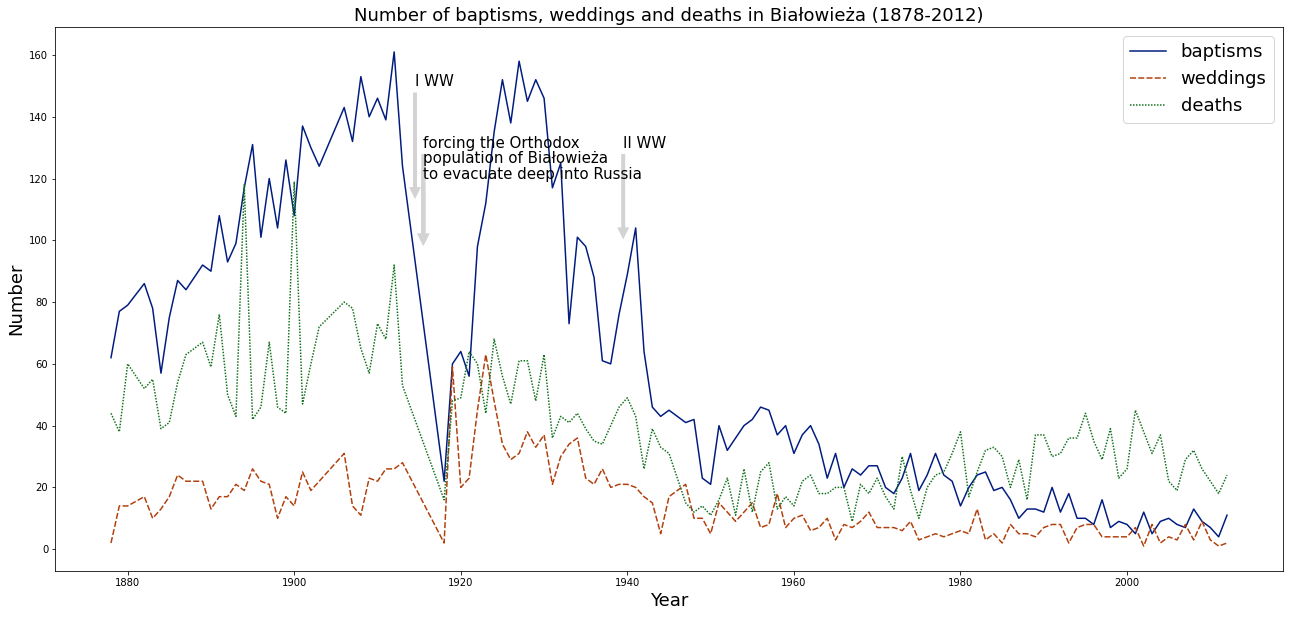

In [8]:
url_data = (r'https://github.com/zuzannazak/PhD2022Bialowieza/blob/main/bialowieza_visualisation.xlsx?raw=true')
DF = pd.read_excel(url_data)
plt.figure(figsize=(22,10))
plt.title("Number of baptisms, weddings and deaths in BiaÅ‚owieÅ¼a (1878-2012)", fontsize=18)
g=sns.lineplot(x=DF["rok"], y=DF["liczba odnotowanych"], hue=DF["zdarzenie"], style=DF["zdarzenie"], palette='dark', legend=True, ci=True)

plt.annotate('I WW', xy=(1914.5, 113), xytext=(1914.5, 150), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('II WW', xy=(1939.5, 100), xytext=(1939.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('forcing the Orthodox', xy=(1915.5, 98), xytext=(1915.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('population of BiaÅ‚owieÅ¼a', xy=(1915.5, 98), xytext=(1915.5, 125), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('to evacuate deep into Russia', xy=(1915.5, 98), xytext=(1915.5, 120), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.ylabel('Number', fontsize=18)
plt.xlabel('Year',fontsize=18 )
plt.legend(fontsize=18 )

sns.set_style("whitegrid")
#plt.style.use('fivethirtyeight')
sns.set_theme()



Text(0.5, 0, 'Event')

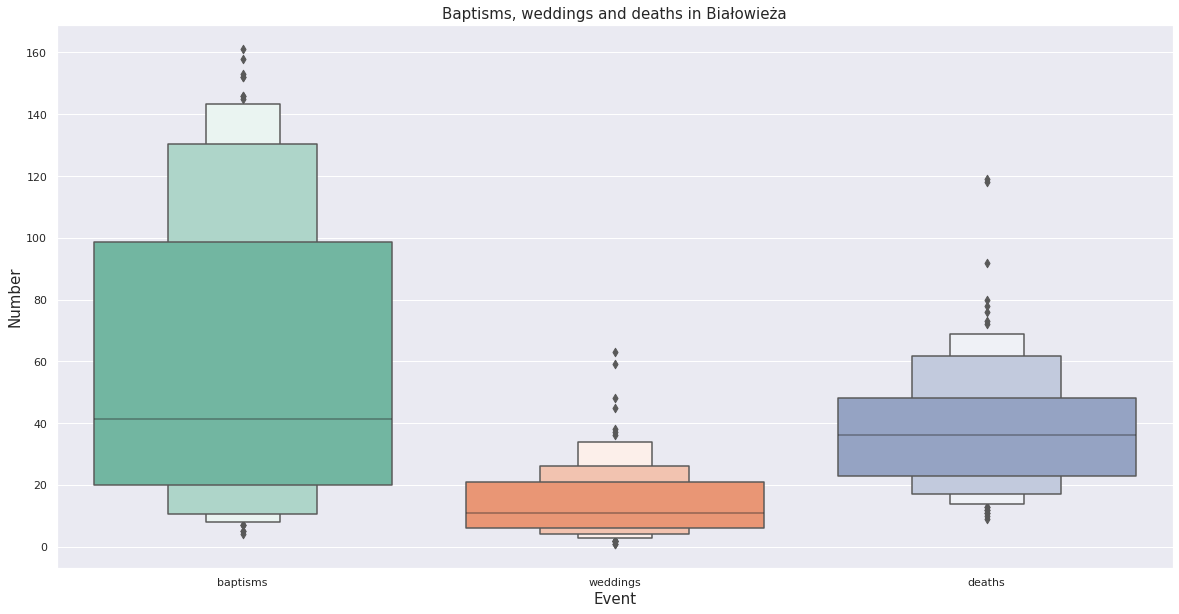

In [9]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in BiaÅ‚owieÅ¼a",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )


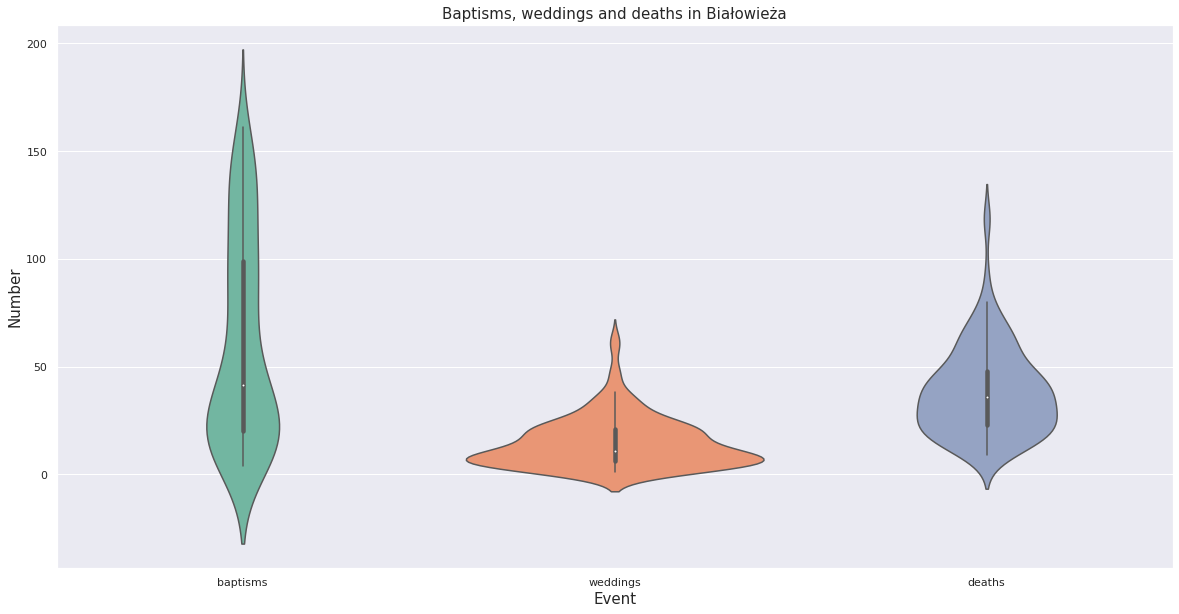

In [10]:
plt.figure(figsize=(20, 10))
sns.violinplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in BiaÅ‚owieÅ¼a",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )

plt.show()

Text(0.5, 0, 'Event')

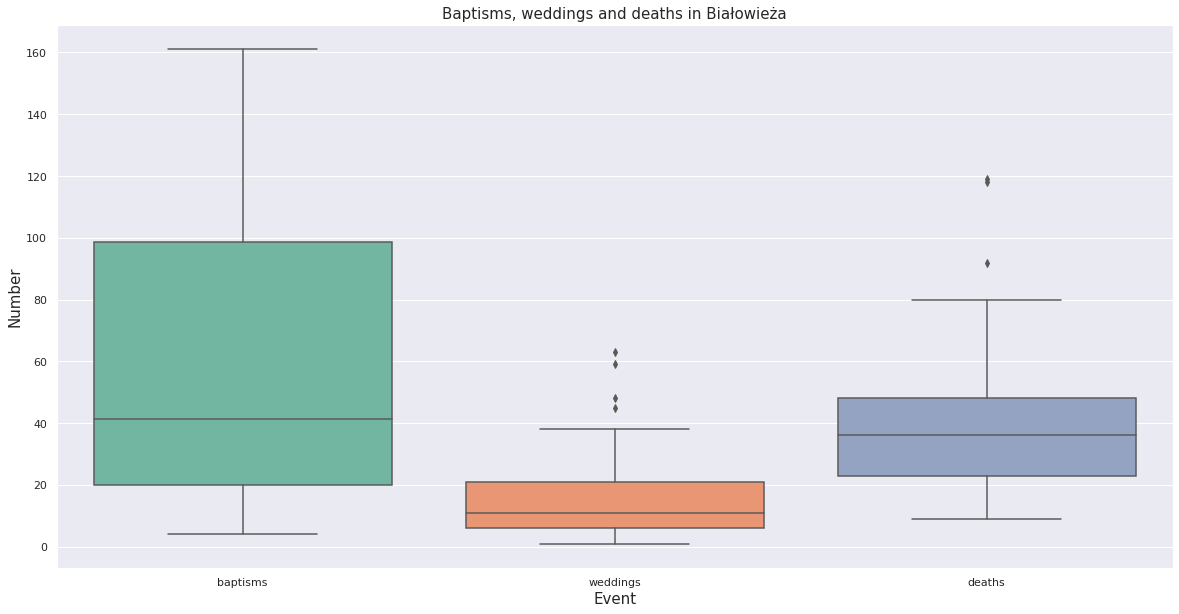

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in BiaÅ‚owieÅ¼a",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )

# ***analysis***

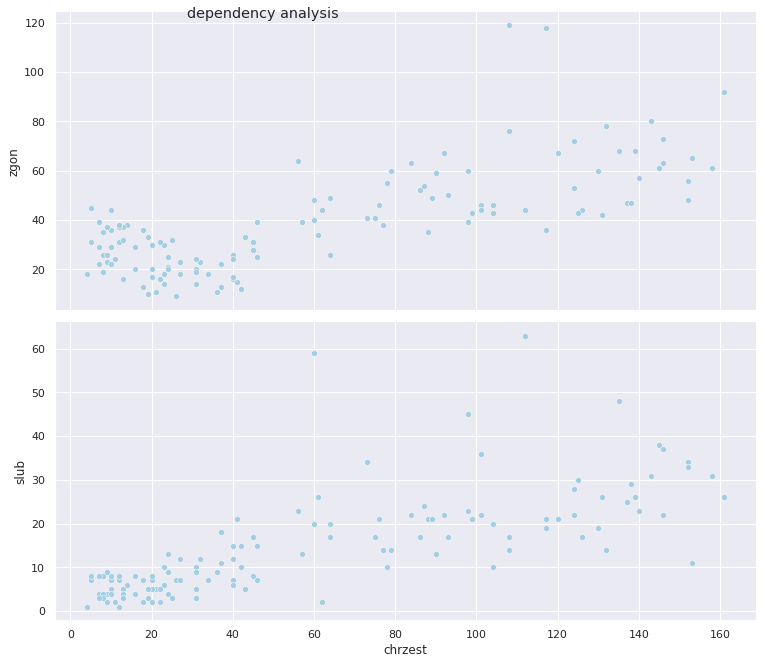

In [ ]:
g=sns.pairplot(df, x_vars=["chrzest"], y_vars=["zgon", "slub"])
g.fig.set_size_inches(15,10)
g.fig.suptitle("dependency analysis")
sns.set_palette(sns.color_palette("Paired"))

## **correlation**

In [ ]:
#correlation
korel = df_aggregateddata.corr()
df_aggregateddata.corr()

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
rok                                                1.000000  ...                                0.926907
chrzest                                           -0.790225  ...                               -0.076208
slub                                              -0.548468  ...                               -0.210090
zgon                                              -0.625626  ...                               -0.476537
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                 -0.249509  ...                               -0.286668
GUS - saldo migracji ogÃ³Å‚em                        0.121983  ...                                0.045927
GUS - LudnoÅ›Ä‡ w gminie                            -0.987842  ...                               -0.925620
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)  0.917007  ...                                0.821922
GUS - urodzenia Å¼ywe w gminie                     -0.631400  ...                               -0.442095
GUS - zgony w gminie                              -0.516797  ...                               -0.345466
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie       -0.933478  ...                               -0.942047
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie     0.917846  ...                                0.921284
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy             0.926907  ...                                1.000000

[13 rows x 13 columns]

## **filling in data gaps**

In [ ]:
#data gaps
df_aggregateddata.isnull().sum()


rok                                                    0
chrzest                                               22
slub                                                  22
zgon                                                  22
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                    122
GUS - saldo migracji ogÃ³Å‚em                          122
GUS - LudnoÅ›Ä‡ w gminie                               122
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)     78
GUS - urodzenia Å¼ywe w gminie                        122
GUS - zgony w gminie                                 122
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie          124
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie       124
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy               124
dtype: int64

In [ ]:
CORREL = df_aggregateddata.corr()
CORREL['chrzest'].to_frame().sort_values('chrzest')
CORREL = df_aggregateddata.corr()
CORREL['slub'].to_frame().sort_values('slub')
CORREL = df_aggregateddata.corr()
CORREL['zgon'].to_frame().sort_values('zgon')
CORREL = df_aggregateddata.corr()
CORREL['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'].to_frame().sort_values('GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - saldo migracji ogÃ³Å‚em'].to_frame().sort_values('GUS - saldo migracji ogÃ³Å‚em')
CORREL = df_aggregateddata.corr()
CORREL['GUS - LudnoÅ›Ä‡ w gminie'].to_frame().sort_values('GUS - LudnoÅ›Ä‡ w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'].to_frame().sort_values('GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)')
CORREL = df_aggregateddata.corr()
CORREL['GUS - urodzenia Å¼ywe w gminie'].to_frame().sort_values('GUS - urodzenia Å¼ywe w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - zgony w gminie'].to_frame().sort_values('GUS - zgony w gminie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'].to_frame().sort_values('CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'].to_frame().sort_values('CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'].to_frame().sort_values('CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy')

CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie                                     -0.942047
GUS - LudnoÅ›Ä‡ w gminie                                                          -0.925620
zgon                                                                            -0.476537
GUS - urodzenia Å¼ywe w gminie                                                   -0.442095
GUS - zgony w gminie                                                            -0.345466
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                                               -0.286668
slub                                                                            -0.210090
chrzest                                                                         -0.076208
GUS - saldo migracji ogÃ³Å‚em                                                      0.045927
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)                                0.821922
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie                                   0.921284
rok                                                                              0.926907
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy                                           1.000000

In [ ]:
df_aggregateddata['chrzest'] = df_aggregateddata.groupby('zgon')['chrzest'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['chrzest'].fillna(method='ffill', inplace=True)  
df_aggregateddata['zgon'] = df_aggregateddata.groupby('GUS - zgony w gminie')['zgon'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['zgon'].fillna(method='ffill', inplace=True)  
df_aggregateddata['slub'] = df_aggregateddata.groupby('chrzest')['slub'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['slub'].fillna(method='ffill', inplace=True)  
df_aggregateddata['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'] = df_aggregateddata.groupby('GUS - urodzenia Å¼ywe w gminie')['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - saldo migracji ogÃ³Å‚em'] = df_aggregateddata.groupby('GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)')['GUS - saldo migracji ogÃ³Å‚em'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - saldo migracji ogÃ³Å‚em'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - LudnoÅ›Ä‡ w gminie'] = df_aggregateddata.groupby('CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie')['GUS - LudnoÅ›Ä‡ w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - LudnoÅ›Ä‡ w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'] = df_aggregateddata.groupby('rok')['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - urodzenia Å¼ywe w gminie'] = df_aggregateddata.groupby('GUS - LudnoÅ›Ä‡ w gminie')['GUS - urodzenia Å¼ywe w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - urodzenia Å¼ywe w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - zgony w gminie'] = df_aggregateddata.groupby('zgon')['GUS - zgony w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - zgony w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'] = df_aggregateddata.groupby('GUS - LudnoÅ›Ä‡ w gminie')['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'] = df_aggregateddata.groupby('CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy')['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'] = df_aggregateddata.groupby('rok')['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'].fillna(method='ffill', inplace=True) 


df_aggregateddata.to_excel(r'fillna_data_bialowieza.xlsx', index = False)

In [ ]:
df_aggregateddata.isnull().sum()

rok                                                    0
chrzest                                                0
slub                                                   0
zgon                                                 117
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                    117
GUS - saldo migracji ogÃ³Å‚em                          117
GUS - LudnoÅ›Ä‡ w gminie                               119
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)     72
GUS - urodzenia Å¼ywe w gminie                        119
GUS - zgony w gminie                                 117
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie          119
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie       119
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy               119
dtype: int64

In [ ]:
df_aggregateddata.dropna(inplace=True)

In [ ]:
df_aggregateddata

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
119  1997  ...                                     3.0
120  1998  ...                                     3.0
121  1999  ...                                     3.0
122  2000  ...                                     3.0
123  2001  ...                                     3.0
124  2002  ...                                     3.0
125  2003  ...                                     3.0
126  2004  ...                                     3.0
127  2005  ...                                     3.0
128  2006  ...                                     4.0
129  2007  ...                                     3.0
135  2013  ...                                     5.0
136  2014  ...                                     6.0
137  2015  ...                                     6.0
138  2016  ...                                     5.0
139  2017  ...                                     5.0
140  2018  ...                                     6.0
141  2019  ...                                     6.0
142  2020  ...                                     7.0
143  2021  ...                                     7.0
144  2022  ...                                     7.0
145  2023  ...                                     7.0
146  2024  ...                                     7.0
147  2025  ...                                     7.0

[24 rows x 13 columns]

## **Regression**

In [ ]:
X = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y = df_aggregateddata["chrzest"].values.reshape(-1,1)
linear_regressor = LinearRegression().fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2.758
Date:                Tue, 25 Jan 2022   Prob (F-statistic):             0.0517
Time:                        02:20:27   Log-Likelihood:                -36.499
No. Observations:                  24   AIC:                             99.00
Df Residuals:                      11   BIC:                             114.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

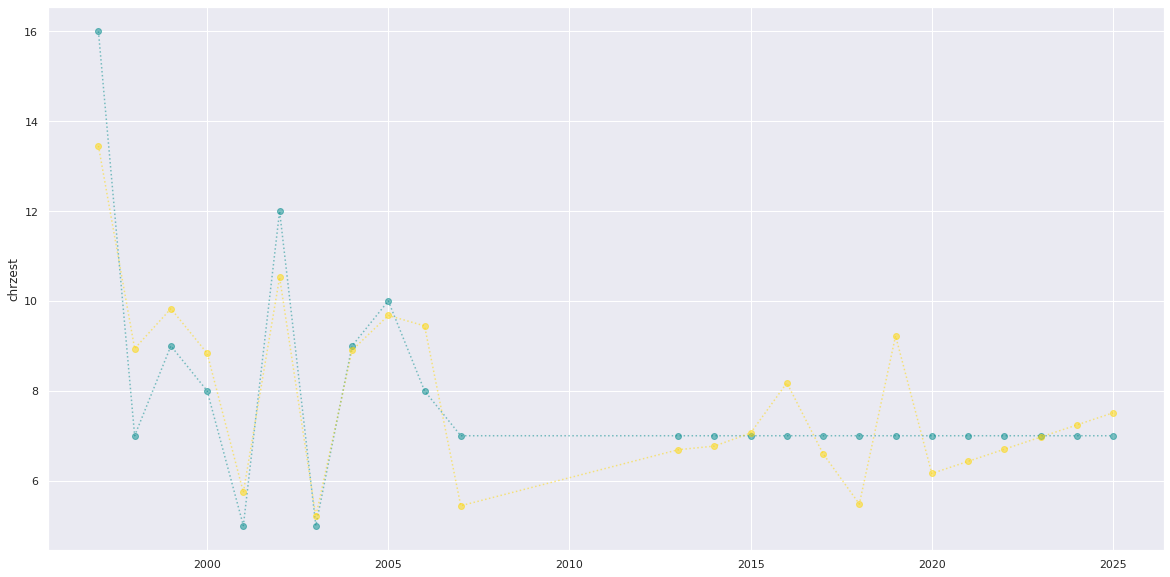

In [ ]:
df_aggregateddata['Y_pred'] = Y_pred
fig, ax = plt.subplots()
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["chrzest"],marker='o', color="darkcyan",alpha=0.5, linestyle='dotted')
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["Y_pred"],marker='o', color="gold",alpha=0.5, linestyle='dotted')
ax.set_ylabel('chrzest')
fig.set_size_inches(20, 10)

## **SNN**

In [ ]:
X_SNN = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y_SNN = df_aggregateddata["chrzest"].values.reshape(-1,1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X_SNN, Y_SNN, test_size=0.33, random_state=42)

In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.10, random_state=1)

In [ ]:
clf = MLPRegressor(solver='adam', learning_rate='adaptive', alpha=1e-5, activation='relu', hidden_layer_sizes=(5,5,5), random_state=2, max_iter=500, batch_size=62)

In [ ]:
clf.fit(X_train, Y_train.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


MLPRegressor(alpha=1e-05, batch_size=62, hidden_layer_sizes=(5, 5, 5),
             learning_rate='adaptive', max_iter=500, random_state=2)

In [ ]:
MSE = mean_squared_error(clf.predict(X_test), Y_test.flatten())
RMSE = np.sqrt(MSE)
RMSE

9.1748440406582

In [ ]:
mean_absolute_percentage_error(clf.predict(X_test), Y_test.flatten())

39.54248442548199

In [ ]:
R_kw = r2_score(Y_test.flatten(), clf.predict(X_test))
R_kw

-7.813483750747142

In [ ]:
clf.predict(X_test)

array([0.21846572, 0.21846572, 0.21846572, 0.21846572, 0.21846572,
       0.21846572, 0.21846572])

In [ ]:
print(f'Predicted value of the observation 4 : {clf.predict(X_test)[3]}')

Predicted value of the observation 4 : 0.21846571522824382


In [ ]:
Y_test[3]

array([10.])

In [ ]:
N= np.arange(1, 8).reshape(-1,1)
Y_test.shape

(7, 1)

#***appendix***